In [1]:
import tensorflow as tf

print("Tensorflow version: ", tf.__version__)

if tf.test.gpu_device_name():
    print("Default GPU: {}".format(tf.test.gpu_device_name()))
else:
    print("Not using a GPU - it will take long!!")

Tensorflow version:  2.9.1
Default GPU: /device:GPU:0


In [2]:
from configuration import *

print("DATASET_SIZE", DATASET_SIZE)
print("TRAIN_SIZE", TRAIN_SIZE)
print("TEST_SIZE", TEST_SIZE)

tf.random.set_seed(SEED)

DATASET_SIZE 294
TRAIN_SIZE 250
TEST_SIZE 44


In [3]:
from pix2pix_model import Pix2PixModel, Pix2PixAugmentedModel, Pix2PixHistogramModel, Pix2PixIndexedModel

MODELS = ["baseline (no aug.)", "baseline", "indexed", "histogram"]
model = MODELS[0]                                   # <-- CHOOSE the model to train here

if model == "baseline (no aug.)":
    model = Pix2PixModel(
        input_direction=DIRECTION_FRONT,
        target_direction=DIRECTION_RIGHT,
        model_name="baseline (no aug.)",            # subfolder in which to save the model and the generated images
        architecture_name="front-to-right",         # folder in which to save the model and the generated images
        lambda_l1=100.)

elif model == "baseline":
    model = Pix2PixAugmentedModel(
        input_direction=DIRECTION_FRONT,
        target_direction=DIRECTION_RIGHT,
        model_name="baseline",
        architecture_name="front-to-right",
        lambda_l1=100.)

elif model == "indexed":
    model = Pix2PixIndexedModel(
        input_direction=DIRECTION_FRONT,
        target_direction=DIRECTION_RIGHT,
        model_name="indexed",
        architecture_name="front-to-right",
        palette_ordering="grayness",            # "grayness", "top2bottom", "bottom2top", or "shuffled"
        lambda_segmentation=0.01)

elif model == "histogram":
    model = Pix2PixHistogramModel(
        input_direction=DIRECTION_FRONT,
        target_direction=DIRECTION_RIGHT,
        model_name="baseline",
        architecture_name="front-to-right",
        lambda_l1=30.,
        lambda_histogram=1.)

Generator: unet-gen with 29,307,844 parameters
Discriminator: patch-disc with 9,217 parameters


In [4]:
EPOCHS = 160
STEPS = ceil(TRAIN_SIZE / BATCH_SIZE) * EPOCHS
UPDATE_STEPS = STEPS // 40

print(f"Starting training for {EPOCHS} epochs in {STEPS} steps, updating visualization every {UPDATE_STEPS} steps...")

Starting training for 160 epochs in 10080 steps, updating visualization every 252 steps...


Time since start: 08m:25s
Estimated time to finish: 28m:59s
Last 252 steps took: 57.17s

Previewing images generated at step 2268 (3 train + 3 test)...


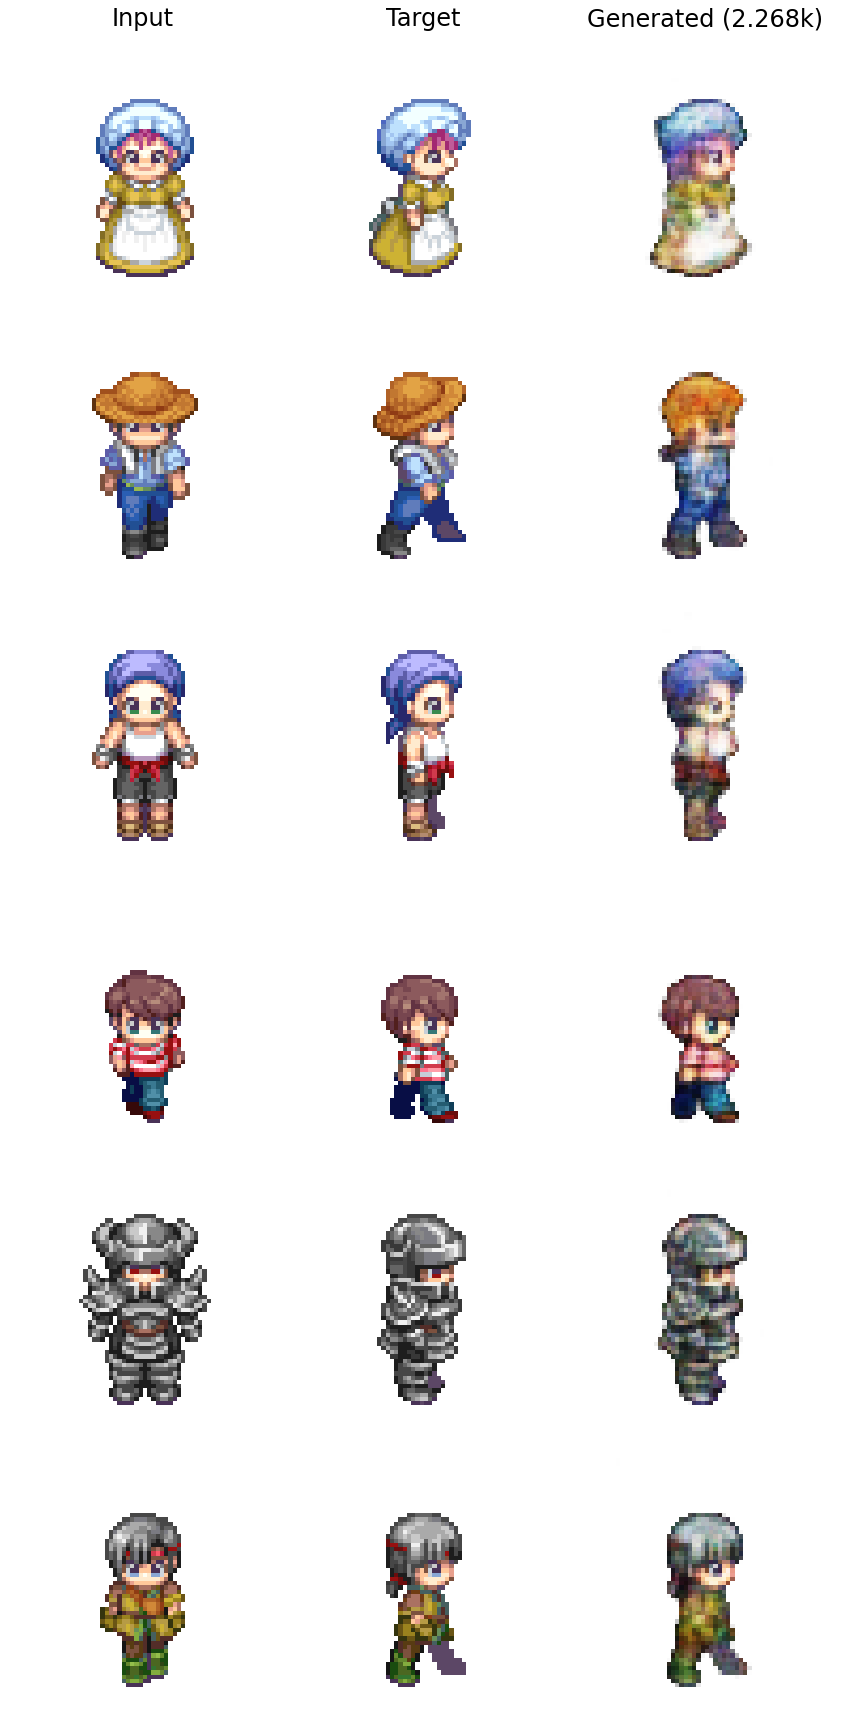

Showing discriminator output patches (2 train + 2 test)...


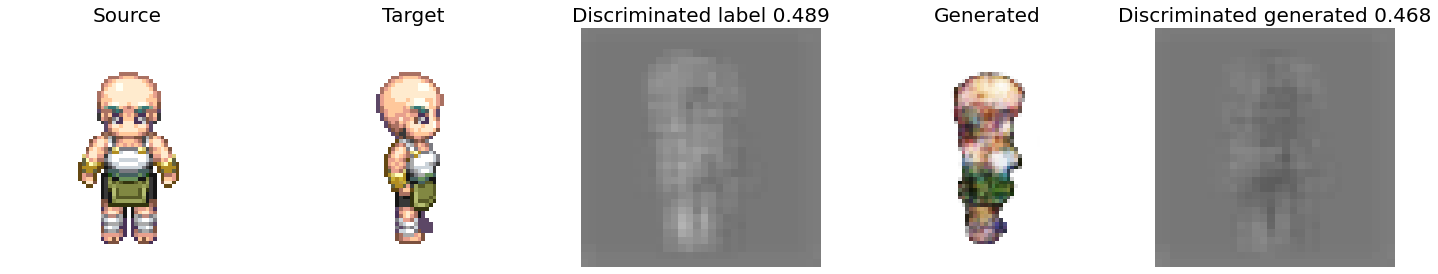

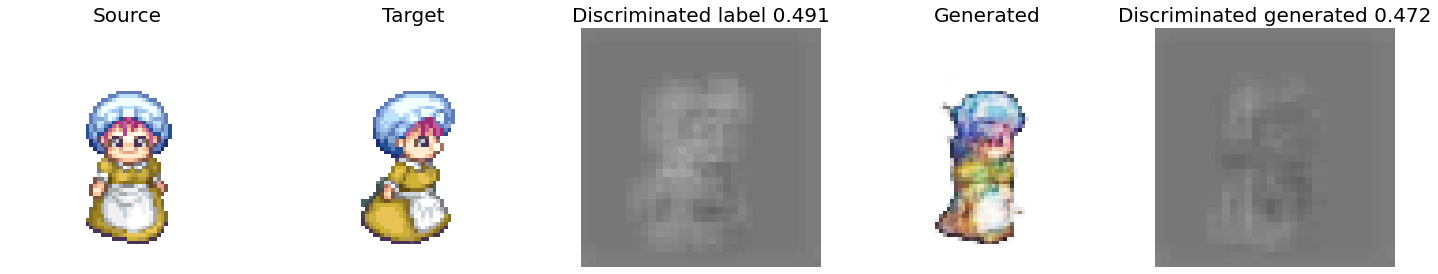

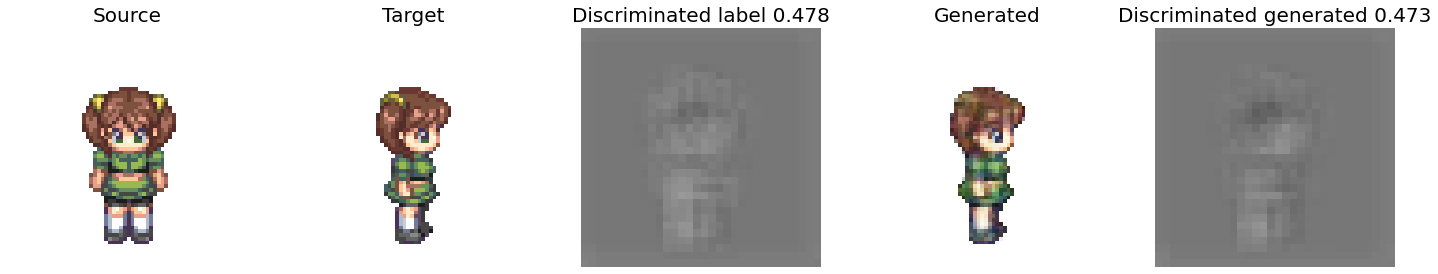

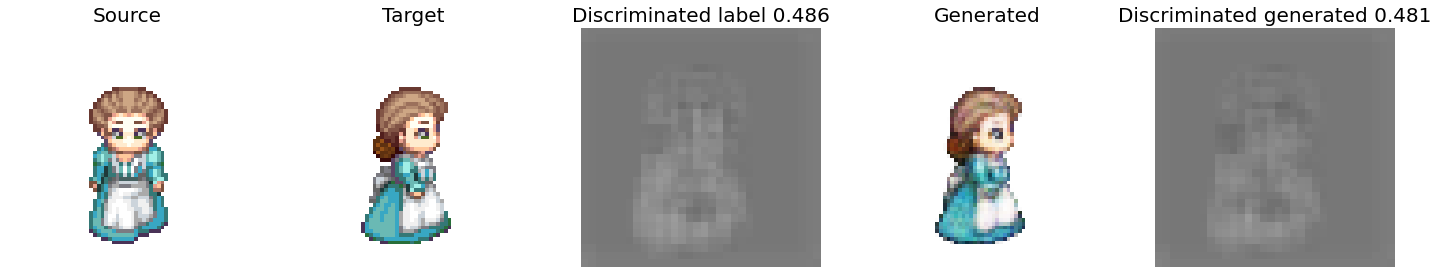

Comparing L1 between generated images from train and test... L1: 0.01848 / 0.06309 (train/test)
Calculating Fréchet Inception Distance at 2.268k with 44 examples...


KeyboardInterrupt: 

In [5]:
SAVE_THE_MODEL_WEIGHTS = True
GENERATE_ALL_IMAGES_FROM_TEST = True

model.fit(STEPS, UPDATE_STEPS, callbacks=["show_discriminator_output", "evaluate_fid", "evaluate_l1"])

In [ ]:
if GENERATE_ALL_IMAGES_FROM_TEST:
    model.generate_images_from_dataset()

In [ ]:
if SAVE_THE_MODEL_WEIGHTS:
    model.save_generator()
    model.save_discriminator()

In [ ]:
print("Showing discriminator output from the TRAIN set...")
model.show_discriminated_images("train", 8)
print("Showing discriminator output from the TEST set...")
model.show_discriminated_images("test", 8)